## Day 10
17/Dec/2021 (Friday)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from mpl_toolkits import mplot3d

In [3]:
X, y, coef  = make_regression(n_samples=200, n_features=2, bias=3, noise=12, coef=True)
y = y.reshape(-1,1)
print(X.shape, y.shape, coef)

(200, 2) (200, 1) [27.94198687 47.25820721]


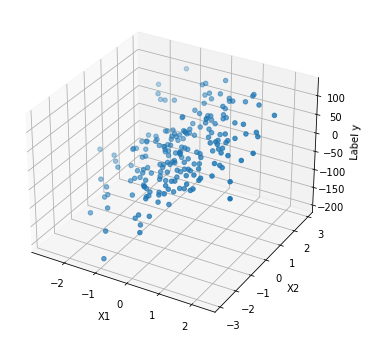

In [4]:
%matplotlib inline
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Label y")

plt.show()

In [5]:
%matplotlib qt
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Label y")

plt.show()

In [6]:
class LinearRegressor:
    
    def predict(self, X):
        """ 
        X: Feature matrix (m, n)
        m is number of samples, n is no. of features
        """
        if self.w.shape[0] != X.shape[1]:
            X = X.copy()
            ones_column = np.ones((len(X),1))
            X = np.concatenate([ones_column, X], axis=1)
        return X.dot(self.w)
    
    def loss(self, y, y_hat):
        return (y-y_hat).T.dot(y-y_hat)[0][0]
    
    def r_squared(self, y, y_hat):
        e_method = self.loss(y, y_hat)
        e_baseline = self.loss(y, y.mean())
        return 1-(e_method/e_baseline)
    
    def sum_of_residuals(self, y, yhat):
        return (y-yhat).sum()
    
    def __get_gradient(self, X, y, y_hat):
        grad = []
        for j in range(X.shape[1]):
            g = -2*((y - y_hat) * (X[:,j].reshape(-1,1))).sum()
            grad.append(g)
        return np.array(grad).reshape(-1,1)
            
    def __gradient_descent(self, X, y, epochs, learning_rate, batch_size):
        idx = np.arange(0, len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        itr = len(X)//batch_size
        
        losses = []
        for i in range(epochs):
            for j in range(itr):
                X_batch, y_batch = X[j*batch_size : (j+1)*batch_size], y[j*batch_size : (j+1)*batch_size]
                y_hat_batch = self.predict(X_batch) 
                grad = self.__get_gradient(X_batch, y_batch, y_hat_batch)
                self.w = self.w - learning_rate*grad
                
            yhat = self.predict(X)
            loss = self.loss(y, yhat)
            losses.append(loss)
            r2 = self.r_squared(y, yhat)
            sor = self.sum_of_residuals(y, yhat)
            print(f"Epoch: {i+1}/{epochs} Loss: {loss}, r2: {r2}, SoR: {sor}")
#             print(f"\rEpoch: {i+1}/{epochs} Loss: {loss}, r2: {r2}, SoR: {sor}", end="")
            
        return losses
    
    def fit(self, X, y, epochs=1000, learning_rate=0.01, method='batch', **kwargs):
        """ 
        Trains the model. Finds the optimal weights in 
               y_hat = w0 + w1.x1 + w2.x2 + . . . + wn.xn
        X: Feature matrix (m,n)
        y: True Label vector (m,1)
        epochs: int value, no. of times you iterate over the entire data
        learning_rate: alpha in the update rule
        method: ('batch', 'mini-batch', 'stochastic')
        kwargs: variable keyword arguments, batch_size 
        """
        X = X.copy()
        ones_column = np.ones((len(X),1))
        X = np.concatenate([ones_column, X], axis=1)
        self.w = np.random.rand(X.shape[1], 1)
        
        if method == 'batch':
            batch_size = X.shape[0]
            
        elif method == 'mini-batch':
            if kwargs.get('batch_size')==None:
                batch_size = int(X.shape[0]*0.25)
            else:
                batch_size = kwargs['batch_size']
                
        elif method == 'stochastic':
            batch_size = 1
                
        return self.__gradient_descent(X, y, epochs, learning_rate, batch_size)

In [9]:
lr = LinearRegressor()
losses = lr.fit(X, y, epochs=50, learning_rate=0.001, method='batch')

Epoch: 1/50 Loss: 233258.03905916787, r2: 0.6725320251759326, SoR: 313.56249689619983
Epoch: 2/50 Loss: 88470.47339870445, r2: 0.8757974350103687, SoR: 158.48079984244322
Epoch: 3/50 Loss: 44484.83325230275, r2: 0.9375483120998768, SoR: 78.85260439593277
Epoch: 4/50 Loss: 31119.91230752805, r2: 0.9563111535141398, SoR: 38.43271439634315
Epoch: 5/50 Loss: 27058.115693587504, r2: 0.9620134577806048, SoR: 18.210321534122542
Epoch: 6/50 Loss: 25823.326523548607, r2: 0.9637469624884308, SoR: 8.28170515916247
Epoch: 7/50 Loss: 25447.81361294186, r2: 0.9642741402562482, SoR: 3.5295045524693265
Epoch: 8/50 Loss: 25333.56275561732, r2: 0.9644345355721863, SoR: 1.3357965971221333
Epoch: 9/50 Loss: 25298.78067140743, r2: 0.9644833656949221, SoR: 0.3778672283877569
Epoch: 10/50 Loss: 25288.183484885147, r2: 0.9644982429494137, SoR: -0.002062368851134977
Epoch: 11/50 Loss: 25284.95152674167, r2: 0.9645027802540751, SoR: -0.12433068139965542
Epoch: 12/50 Loss: 25283.96453431634, r2: 0.96450416588010

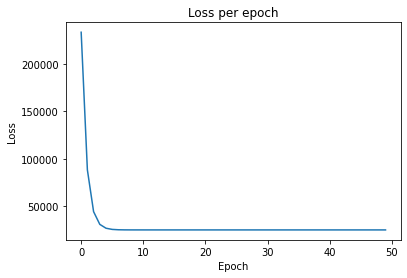

In [16]:
%matplotlib inline
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per epoch")
plt.show()

In [17]:
lr.w

array([[ 2.56332723],
       [27.33838814],
       [48.12897322]])

## Visualize the prediction plane

In [18]:
ypred = lr.predict(X)
print(ypred.shape)

(200, 1)


In [30]:
f1 = np.linspace(X[:,0].min(), X[:,0].max(), 50)
f2 = np.linspace(X[:,1].min(), X[:,1].max(), 50)

f1, f2 = np.meshgrid(f1, f2)

f1, f2 = f1.reshape(-1,1), f2.reshape(-1,1)
print(f1.shape, f2.shape)

x = np.concatenate([f1, f2], axis=1)
print(x.shape)

(2500, 1) (2500, 1)
(2500, 2)


In [31]:
x[:5]

array([[-2.70331823, -2.88977527],
       [-2.60051161, -2.88977527],
       [-2.49770499, -2.88977527],
       [-2.39489837, -2.88977527],
       [-2.29209175, -2.88977527]])

In [33]:
ypred = lr.predict(x)
print(ypred.shape)

(2500, 1)


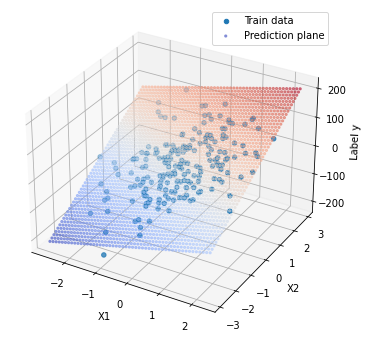

In [45]:
# %matplotlib qt
%matplotlib inline
plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], y, label="Train data")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Label y")

# ax.plot_surface(f1, f2, ypred, cmap=plt.cmap.coolwarm, alpha=0.5)
ax.scatter(f1, f2, ypred, s=5, c=ypred, cmap=plt.cm.coolwarm, alpha=0.5, label="Prediction plane")
plt.legend()
plt.show()